In [ ]:
# Google Drive 접근을 위한 Mount 적용.
import os, sys
from google.colab import drive

drive.mount('/content/gdrive')# Google Drive 접근을 위한 Mount 적용.
import os, sys
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 강의:  
###딥러닝 컴퓨터 비전 완벽가이드 (인프런)  
###출처:   
### https://github.com/chulminkw/DLCV_New/tree/main/faster_rcnn

# mmcv 설치

In [ ]:
import torch
print(torch.__version__)

2.0.1+cu118


In [ ]:
!pip install torch==1.13.0+cu116 torchvision==0.14.0+cu116 torchaudio==0.13.0 --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 915.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 55.0 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1+cu118
    Uninstalling torch-2.0.1+cu118:
      Successfully uninstalled torch-2.0.1+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.2+cu118
    Uninstalling torchvision-0.15.2+cu118:
      Successfully uninstalled torchvision-0.15.2+cu118
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.0.2+cu118
    Uninstalling torchaudio-2.0.2+cu118:
      Successfully uninstalled torchaudio-2.0.2+cu118
ERROR: pip's dependency resolver does not currently take into account all th

In [ ]:
pip install mmcv-full==1.7.0 -f https://download.openmmlab.com/mmcv/dist/cu117/torch1.13/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu117/torch1.13/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 12.4 MB/s eta 0:00:00


# mmdetection 다운로드

In [ ]:
!git clone --branch 2.x https://github.com/open-mmlab/mmdetection.git

Cloning into 'mmdetection'...
remote: Enumerating objects: 36296, done.
remote: Counting objects: 100% (947/947), done.
remote: Compressing objects: 100% (548/548), done.
remote: Total 36296 (delta 480), reused 708 (delta 386), pack-reused 35349
Receiving objects: 100% (36296/36296), 56.73 MiB | 10.29 MiB/s, done.
Resolving deltas: 100% (25415/25415), done.


In [ ]:
cd mmdetection

/content/mmdetection


In [ ]:
 #강의에서는 선행되어야 한다고 했으나 설치하지 못함
!python setup.py install

running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based t

In [ ]:
from mmdet.apis import init_detector, inference_detector
import mmcv

/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


# 데이터 load 테스트

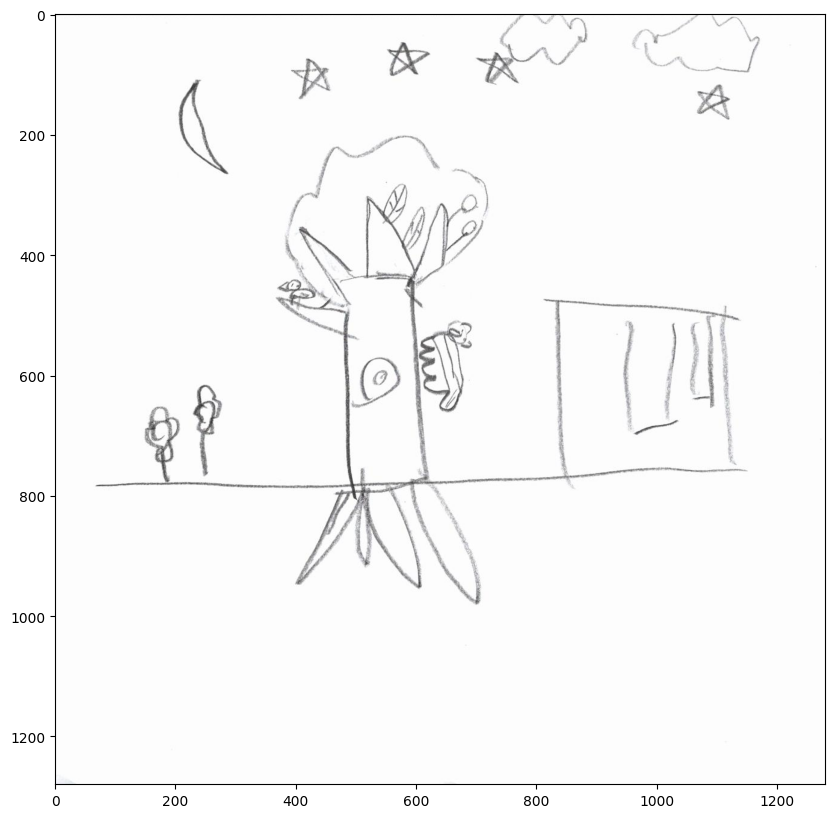

In [ ]:
import matplotlib.pyplot as plt
import cv2

origin = cv2.imread('gdrive/MyDrive/HTP_dataset/tree/image/tree_2.jpg')
img = cv2.cvtColor(origin, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))
plt.imshow(img)

In [ ]:
cd mmdetection

/content/mmdetection


In [ ]:
import glob

filenames = []
files = sorted(glob.glob('*.jpg'))

for i in range(len(files)):
    f = open("./train.txt",'a')
    f.write(files[i] + '\n')

In [ ]:
cd ..

/content


In [ ]:
from glob import glob
from sklearn.model_selection import train_test_split

img_file_list = []
def extract_name(img_list):
	img_file_list = []
	for file_path in img_list:
		names = file_path.split('/')
		names = names[-1]
		names = names.split('.')
		img_file_list.append(names[0])

	return img_file_list

path = "gdrive/MyDrive/HTP_dataset/tree" #학습을 돌릴 path => train.txt와 val.txt를 저장할 path
image_path= "gdrive/MyDrive/HTP_dataset/tree/image" # 이미지가 있는 디렉토리, 나는 절대 경로를 넣어두는 편이다.
img_list = glob(f'{image_path}/*') # 이미지 파일들의 이름 들을 읽어온 후 리스트로 저장한다.
img_file_list = extract_name(img_list)

train_img_list,val_img_list = train_test_split(img_file_list,train_size=0.8,random_state=2000)
#test_size => 전체 데이터 셋에서 val_img_list 가 가져갈 비율
# random_state => 섞는 비율

print(len(train_img_list),len(val_img_list))

with open(f'{path}/train.txt','w') as f:
	f.write('\n'.join(train_img_list)+'\n')

with open(f'{path}/val.txt','w') as f:
	f.write('\n'.join(val_img_list)+'\n')

800 200


In [ ]:
img_file_list[:10]

['tree_344',
 'tree_411',
 'tree_834',
 'tree_45',
 'tree_575',
 'tree_181',
 'tree_652',
 'tree_938',
 'tree_204',
 'tree_968']

In [ ]:
import json
import tqdm
import os

In [ ]:
# 모든 classes의 이름을 읽어오는 함수 HOUSE_CLASSES에 저장할 것
def get_classes_names(annot_path):
    annots = [os.path.join(annot_path, s) for s in list(filter(lambda x: x.endswith('.json'), os.listdir(annot_path)))]
    #print(annots)
    idx = 0
    label_count = {}
    label_mapping = {}
    #annots = tqdm(annots)
    for annot in annots:
        exist_flag = False
        idx += 1
        with open(annot,'r', encoding='utf-8') as f:
            json_data = json.load(f)

        num_objs = json_data['annotations']['bbox']

        for obj in num_objs:
            label_name = obj['label']
            if label_name not in label_count:
                label_count[label_name] = 1
            else:
                label_count[label_name] += 1

            if label_name not in label_mapping:
                label_mapping[label_name] = len(label_mapping)


    return label_count, label_mapping



In [ ]:
ls

gdrive/  mmdetection/  sample_data/


In [ ]:
labels_count, label_mapping = get_classes_names('gdrive/MyDrive/HTP_dataset/tree/labels')

In [ ]:
labels = list(label_mapping)
labels

['whole_tree',
 'trunk',
 'crown',
 'branch',
 'root',
 'leaf',
 'flower',
 'fruit',
 'swing',
 'bird',
 'squirrel',
 'cloud',
 'moon',
 'star']

In [ ]:
def get_bboxes(jsonfile):
    bbox_names = []
    bboxes = []
    with open(jsonfile, 'r', encoding='utf-8') as f:
        jsondata = json.load(f)
    n_bboxes = jsondata['annotations']['bbox']
    #print(n_bboxes)
    for i in n_bboxes:
        bbox_names.append(i['label'])
        #print(bbox_names)
        x1 = int(i['x'])
        y1 = int(i['y'])
        x2 = int(i['x']) + int(i['w'])
        y2 = int(i['y']) + int(i['h'])
        bboxes.append([x1, y1, x2, y2])

    return bbox_names, bboxes

In [ ]:
import os.path
import numpy as np

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

TREE_CLASSES = labels

@DATASETS.register_module(force=True)
class HTPDataset(CustomDataset):
    CLASSES = TREE_CLASSES

    def load_annotations(self, ann_file):
        cat2label = {k:i for i, k in enumerate(self.CLASSES)}
        image_list = mmcv.list_from_file(self.ann_file)
        data_infos = []

        for image_id in image_list:
            filename = '{0:}/{1:}.jpg'.format(self.img_prefix, image_id)
            image = cv2.imread(filename)
            #print(filename)
            height, width = image.shape[:2]
            data_info = {'filename': filename, 'width':width, 'height':height}
            #print(data_info)
            label_prefix = self.img_prefix.replace('image','labels')
            anno_json_file = os.path.join(label_prefix, str(image_id)+'.json')
            #print(anno_json_file)
            if not os.path.exists(anno_json_file):
                continue
            anno_dir = label_prefix
            bbox_names, bboxes = get_bboxes(anno_json_file)

            gt_bboxes = []
            gt_labels = []
            gt_bboxes_ignore = []
            gt_labels_ignore = []

            for bbox_name, bbox in zip(bbox_names, bboxes):
                if bbox_name in cat2label:
                    gt_bboxes.append(bbox)
                    gt_labels.append(cat2label[bbox_name])
                else:
                    gt_bboxes_ignore.append(bbox)
                    gt_labels_ignore.append(-1)
            data_anno = {
                'bboxes': np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
                'labels': np.array(gt_labels, dtype=np.long),
                'bbox_ignore': np.array(gt_bboxes_ignore, dtype=np.float32).reshape(-1,4),
                'label_ignore':np.array(gt_labels_ignore, dtype=np.long)
            }
            data_info.update(ann=data_anno)
            #print(data_info)
            data_infos.append(data_info)

        return data_infos

In [ ]:
ls

gdrive/  mmdetection/  sample_data/


In [ ]:
config_file = './mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = './mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [ ]:
cd mmdetection

/content/mmdetection


In [ ]:
mkdir checkpoints

In [ ]:
 cd ..

/content


In [ ]:
!wget -O ./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2023-06-02 02:18:10--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.246.48.210, 47.246.48.206, 47.246.48.209, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|47.246.48.210|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

./mmdetection/check 100%[===================>] 159.54M  64.8MB/s    in 2.5s    

2023-06-02 02:18:12 (64.8 MB/s) - ‘./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [ ]:
from mmcv import Config

cfg = Config.fromfile(config_file)
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

In [ ]:
pwd

'/content'

In [ ]:
# Google Drive 밑에 Directory 생성. 이미 생성 되어 있을 시 오류 발생.
!mkdir "gdrive/MyDrive/tree_dir"

mkdir: cannot create directory ‘gdrive/MyDrive/tree_dir’: File exists


In [ ]:
!nvidia-smi

Fri Jun  2 02:18:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    46W / 400W |      3MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
cd mmdetection

/content/mmdetection


In [ ]:
from mmdet.apis import set_random_seed

# dataset에 대한 환경 파라미터 수정.
cfg.dataset_type = 'HTPDataset'
cfg.data_root = '/content/gdrive/MyDrive/HTP_dataset/tree'

# train, val, test dataset에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정.
cfg.data.train.type = 'HTPDataset'
cfg.data.train.data_root = '/content/gdrive/MyDrive/HTP_dataset/tree'
cfg.data.train.ann_file = 'train.txt'
cfg.data.train.img_prefix = 'image'

cfg.data.val.type = 'HTPDataset'
cfg.data.val.data_root = '/content/gdrive/MyDrive/HTP_dataset/tree'
cfg.data.val.ann_file = 'val.txt'
cfg.data.val.img_prefix = 'image'

# class의 갯수 수정.
cfg.model.roi_head.bbox_head.num_classes = 14
# pretrained 모델
cfg.load_from = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리로 구글 Drive 설정.
cfg.work_dir = '/content/gdrive/MyDrive/tree_dir'

# 학습율 변경 환경 파라미터 설정.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 5

cfg.runner.max_epochs = 5

# 평가 metric 설정.
cfg.evaluation.metric = 'mAP'
# 평가 metric 수행할 epoch interval 설정.
cfg.evaluation.interval = 20
# 학습 iteration시마다 모델을 저장할 epoch interval 설정.
cfg.checkpoint_config.interval = 20

# 학습 시 Batch size 설정(단일 GPU 별 Batch size로 설정됨)
cfg.data.samples_per_gpu = 4

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
# 두번 config를 로드하면 lr_config의 policy가 사라지는 오류로 인하여 설정.
cfg.lr_config.policy='step'

cfg.device='cuda'
# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_w

In [ ]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# train용 Dataset 생성.
datasets = [build_dataset(cfg.data.train)]

<ipython-input-14-b675d9ec1628>:47: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'labels': np.array(gt_labels, dtype=np.long),
<ipython-input-14-b675d9ec1628>:49: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which

In [ ]:
datasets[0]


HTPDataset Train dataset with number of images 800, and instance counts: 
+----------------+-------+------------+-------+-----------+-------+------------+-------+---------------+-------+
| category       | count | category   | count | category  | count | category   | count | category      | count |
+----------------+-------+------------+-------+-----------+-------+------------+-------+---------------+-------+
| 0 [whole_tree] | 800   | 1 [trunk]  | 801   | 2 [crown] | 864   | 3 [branch] | 1304  | 4 [root]      | 806   |
| 5 [leaf]       | 2533  | 6 [flower] | 1736  | 7 [fruit] | 3011  | 8 [swing]  | 820   | 9 [bird]      | 877   |
| 10 [squirrel]  | 818   | 11 [cloud] | 1509  | 12 [moon] | 805   | 13 [star]  | 2719  | -1 background | 0     |
+----------------+-------+------------+-------+-----------+-------+------------+-------+---------------+-------+

In [ ]:
model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model.CLASSES = datasets[0].CLASSES

mmcv.mkdir_or_exist(os.path.abspath(cfg.work_dir))
# epochs는 config의 runner 파라미터로 지정됨. 기본 12회
train_detector(model, datasets, cfg, distributed=False, validate=True)

2023-06-02 02:26:16,929 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
<ipython-input-14-b675d9ec1628>:47: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'labels': np.array(gt_labels, dtype=np.long),
<ipython-input-14-b675d9ec1628>:49: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In 

In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# BGR Image 사용
img = cv2.imread('/content/gdrive/MyDrive/HTP_dataset/tree/image/tree_306.jpg')

model.cfg = cfg

# result = inference_detector(model, img)
# show_result_pyplot(model, img, result, score_thr=0.3)

In [ ]:
# result

# 저장된 학습 결과를 이용하여 모델 생성 & 결과 확인

In [ ]:
from mmdet.apis import show_result_pyplot

checkpoint_file = '/content/gdrive/MyDrive/tree_dir/epoch_100.pth'

# checkpoint 저장된 model 파일을 이용하여 모델을 생성, 이때 Config는 위에서 update된 config 사용.
model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')
# BGR Image 사용
# img = cv2.imread('/content/gdrive/MyDrive/HTP_dataset/tree/image/tree_88.jpg')
model_ckpt.cfg = cfg

# result = inference_detector(model_ckpt, img)
# show_result_pyplot(model_ckpt, img, result, score_thr=0.3)

load checkpoint from local path: /content/gdrive/MyDrive/tree_dir/epoch_100.pth


# validation 이미 list 확인

In [ ]:
val_img_list[:5]

['tree_987', 'tree_12', 'tree_847', 'tree_534', 'tree_645']

# validation 이미지 prefix

In [ ]:
img_prefix = '/content/gdrive/MyDrive/HTP_dataset/tree/image/'

#  validation 이미지 path 생성함수

In [ ]:
def extract_path(img_prefix, file_list):
    val_img_paths = []
    for i in file_list:
        img_path = img_prefix + i + '.jpg'
        val_img_paths.append(img_path)
    return val_img_paths

# validation 이미지 전체에 대해 path 생성

In [ ]:
val_img_lists = extract_path(img_prefix, val_img_list)

# 생성된 path 확인

In [ ]:
val_img_lists[:10]

['/content/gdrive/MyDrive/HTP_dataset/tree/image/tree_987.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/tree/image/tree_12.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/tree/image/tree_847.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/tree/image/tree_534.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/tree/image/tree_645.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/tree/image/tree_74.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/tree/image/tree_380.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/tree/image/tree_787.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/tree/image/tree_250.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/tree/image/tree_894.jpg']

# cv2로 이미지를 읽어서 validation 이미지를 val_imgs에 저장

In [ ]:
import cv2
val_imgs = [cv2.imread(x) for x in val_img_lists]

val_imgs 확인

In [ ]:
type(val_imgs), len(val_imgs), val_imgs[0].shape

(list, 200, (1280, 1280, 3))

# garbage collecting

In [ ]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

# val_imgs 100개에 대해 학습한 결과르 저장해둔 모델로 추론

In [ ]:
results = inference_detector(model_ckpt, val_imgs[:100])

/usr/local/lib/python3.10/dist-packages/mmdet-2.28.2-py3.10.egg/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


# results 확인 (14개의 object에 대해 detection함)

In [ ]:
# len(results[0])

# 모델이 이미지로부터 object detection을 수행하고 detection한 bbox의 좌표와 label을 반환하는 함수

In [ ]:
labels_to_names_seq = {i:k for i, k in enumerate(TREE_CLASSES)}

 #model과 원본 이미지 array, filtering할 기준 class confidence score를 인자로 가지는 inference 시각화용 함수 생성.
def get_detected_img(model, img_array,  score_threshold=0.7, is_print=True):
  lists = []
  # 인자로 들어온 image_array를 복사.
  draw_img = img_array.copy()
  bbox_color=(0, 255, 0)
  text_color=(0, 0, 255)

  # model과 image array를 입력 인자로 inference detection 수행하고 결과를 results로 받음.
  # results는 80개의 2차원 array(shape=(오브젝트갯수, 5))를 가지는 list.
  results = inference_detector(model, img_array)

  # 80개의 array원소를 가지는 results 리스트를 loop를 돌면서 개별 2차원 array들을 추출하고 이를 기반으로 이미지 시각화
  # results 리스트의 위치 index가 바로 COCO 매핑된 Class id. 여기서는 result_ind가 class id
  # 개별 2차원 array에 오브젝트별 좌표와 class confidence score 값을 가짐.
  for result_ind, result in enumerate(results):
    # 개별 2차원 array의 row size가 0 이면 해당 Class id로 값이 없으므로 다음 loop로 진행.
    if len(result) == 0:
      continue

    # 2차원 array에서 5번째 컬럼에 해당하는 값이 score threshold이며 이 값이 함수 인자로 들어온 score_threshold 보다 낮은 경우는 제외.
    result_filtered = result[np.where(result[:, 4] > score_threshold)]

    # 해당 클래스 별로 Detect된 여러개의 오브젝트 정보가 2차원 array에 담겨 있으며, 이 2차원 array를 row수만큼 iteration해서 개별 오브젝트의 좌표값 추출.
    for i in range(len(result_filtered)):
      # 좌상단, 우하단 좌표 추출.
      left = int(result_filtered[i, 0])
      top = int(result_filtered[i, 1])
      right = int(result_filtered[i, 2])
      bottom = int(result_filtered[i, 3])
      score = result_filtered[i, 4]
      li = [labels_to_names_seq[result_ind], score, left, top, right, bottom]
      lists.append(li)
      caption = "{}: {:.4f}".format(labels_to_names_seq[result_ind], result_filtered[i, 4])
      cv2.rectangle(draw_img, (left, top), (right, bottom), color=bbox_color, thickness=2)
      cv2.putText(draw_img, caption, (int(left), int(top - 7)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, text_color, 1)
    #   if is_print:
    #     print(caption)

  return lists, draw_img

# list에 200개의 이미지에 대한 추론 결과가 담김

In [ ]:
def getRatio(a, b):
    frac = Fraction(a, b)
    decimal = float(frac)

    return Decimal(decimal).quantize(Decimal('0.00'))

In [ ]:
#predict = {'whole_tree':0, 'trunk':0, 'crown':0, 'branch':0, 'root':0, 'leaf':0, 'flower':0, 'fruit':0, 'swing':0, 'bird':0, 'squirrel':0, 'cloud':0, 'moon':0, 'star':0}

def countLabel(lists):
    predict = {'whole_tree':0, 'trunk':0, 'crown':0, 'branch':0, 'root':0, 'leaf':0, 'flower':0, 'fruit':0, 'swing':0, 'bird':0, 'squirrel':0, 'cloud':0, 'moon':0, 'star':0}
    for i in lists:
        li = list(i)
        if li[0] == 'whole_tree':
            predict['whole_tree'] += 1

        if li[0] == 'trunk':
            predict['trunk'] += 1

        if li[0] == 'crown':
            predict['crown'] += 1

        if li[0] == 'branch':
            predict['branch'] += 1

        if li[0] == 'root':
            predict['root'] += 1

        if li[0] == 'leaf':
            predict['leaf'] += 1

        if li[0] == 'flower':
            predict['flower'] += 1

        if li[0] == 'fruit':
            predict['fruit'] += 1

        if li[0] == 'swing':
            predict['swing'] += 1

        if li[0] == 'bird':
            predict['bird'] += 1

        if li[0] == 'squirrel':
            predict['squirrel'] += 1

        if li[0] == 'cloud':
            predict['cloud'] += 1

        if li[0] == 'moon':
            predict['moon'] += 1

        if li[0] == 'star':
            predict['star'] += 1

    # for j in predict:
    #     print(j, predict[j])

    print(len(lists))
    return predict

In [ ]:
def samelabel(labelList, label):
    li = []
    for i in labelList:
        if i[0] == label:
            li.append(i)

    return li

In [ ]:
def maxIdx(labels):
    maxIdx = 0
    max = labels[0][1]
    i = 0
    x = len(labels)
    while(i < x):
        if labels[i][1] > max:
            maxIdx = i
            max = labels[i][1]
        i += 1

    return maxIdx

In [ ]:
def extractIdx(fruits):
    xlist = []
    for i in fruits:
        xlist.append(i[3])

    return xlist

In [ ]:
from fractions import Fraction
from decimal import *
# 이미지의 크기도 같이 넘길 것인지 결정해야함. 현재 데이터는 1280x1280으로 동일하긴 함
def postprocessing(lists):
    height = 1280
    width = 1280
    featureLists = []
    # 모든 객체들을 개수를 저장해두는 dict, detection이 되지 않았을 경우 해당 key의 value가 비어있게 된다.
    labelList = countLabel(lists)
    wholeArea = height * width

    # for i in lists:
    #     print(i)

    if labelList['whole_tree'] < 1:
        print('There is no Tree.')

    if  labelList['trunk'] < 1:
        print('There is no Trunk.')

    if labelList['crown'] < 1:
        print('There is no Crown.')

    existTree = True if labelList['whole_tree'] >= 1 else False
    existTrunk = True if labelList['trunk'] >= 1 else False
    existCrown = True if labelList['crown'] >= 1 else False
    existleaf = True if labelList['leaf'] >= 1 else False
    # existWindow = True if labelList['window'] >= 1 else False
    # existChimney = True if labelList['chimney'] >= 1 else False
    # existSmoke = True if labelList['smoke'] >= 1 else False

    # 나무가 존재하면
    if existTree == True:
        # 나무가 2개 이상일 때
        if labelList['whole_tree'] >=2:
            trees = samelabel(lists, 'whole_tree')
            t_maxIdx = maxIdx(trees)
            t_maxObject = trees[t_maxIdx]
            i = lists.index(t_maxObject)
            tx1, ty1, tx2, ty2 = lists[i][2],lists[i][3],lists[i][4],lists[i][5]
        else:
            # 개수가 1개일 때
            trees = samelabel(lists, 'whole_tree')
            if len(trees) == 1:
                tx1, ty1, tx2, ty2 = trees[0][2],trees[0][3],trees[0][4],trees[0][5]
        treeArea = (tx2-tx1) * (ty2-ty1)
        treeRatio = getRatio(treeArea, wholeArea)
        print('나무의 비율:', treeRatio)

        if treeRatio >= 0.5:
            print('지나치게 큰 나무')
            featureLists.append(4)

        if treeRatio <= 0.13:
            print('지나치게 작은 나무')
            featureLists.append(5)

        if tx2 < width*0.35:
            print('좌측에 위치한 나무')
            featureLists.append(7)

        if tx1 > width*0.7:
            print('우측에 위치한 나무')
            featureLists.append(8)

        if ty1 > height*0.5:
            print('하단에 위치한 나무')
            featureLists.append(9)

    if existTrunk == True:
        if labelList['trunk'] >=2:
            trunks = samelabel(lists, 'trunk')
            tk_maxIdx = maxIdx(trunks)
            tk_maxObject = trunks[tk_maxIdx]
            i = lists.index(tk_maxObject)
            tkx1, tky1, tkx2, tky2 = lists[i][2],lists[i][3],lists[i][4],lists[i][5]
        else:
            trunks = samelabel(lists, 'trunk')
            if len(trunks) == 1:
                tkx1, tky1, tkx2, tky2 = trunks[0][2],trunks[0][3],trunks[0][4],trunks[0][5]

        trunkWidth = (tkx2-tkx1)
        trunkHeight = (tky2-tky1)
        trunkArea = trunkWidth * trunkHeight

    if existCrown == True:
        if labelList['crown'] >=2:
            crowns = samelabel(lists, 'crown')
            c_maxIdx = maxIdx(crowns)
            c_maxObject = crowns[c_maxIdx]
            i = lists.index(c_maxObject)
            cx1, cy1, cx2, cy2 = lists[i][2],lists[i][3],lists[i][4],lists[i][5]
        else:
            crowns = samelabel(lists, 'crown')
            if len(crowns) == 1:
                cx1, cy1, cx2, cy2 = crowns[0][2],crowns[0][3],crowns[0][4],crowns[0][5]

        crownWidth = (cx2-cx1)
        crownHeight = (cy2-cy1)
        crownArea = crownWidth * crownHeight

    if existTrunk ==True and existCrown == True:
        crownRatio = getRatio(crownArea, trunkArea)
        print('crownRatio:', crownRatio)
        if (float(crownWidth / trunkWidth) >= 3.5 and float(crownHeight / trunkHeight) >= 0.8) or crownRatio >= 2.5:
            print('기둥에 비해 지나치게 큰 수관')
            featureLists.append(12)

        if (float(crownWidth / trunkWidth) <= 2 and float(crownHeight / trunkHeight) < 0.6) or crownRatio <= 1.0:
            print('기둥에 비해 지나치게 작은 수관')
            featureLists.append(13)

    if labelList['leaf'] >= 6:
        print('잎이 무성하고 큼')
        featureLists.append(28)

    if labelList['fruit'] >= 8:
        print('지나치게 많은 열매')
        featureLists.append(30)

    treeHeight = (ty2-ty1)
    fallenFruit = False

    if labelList['fruit'] >=2:
        # fruits를 모두 저장함
        fruits = samelabel(lists, 'fruit')
        # fruits의 우상단 좌표들의 값을 가져옴
        f_Idx = extractIdx(fruits)
        for j in f_Idx:
            if j >= ty1+int(treeHeight*0.75):
                fallenFruit= True

    if fallenFruit == True:
        print('떨어진 열매')
        featureLists.append(31)

    if len(featureLists) == 0:
        print(len(featureLists))
        featureLists.append(0)
    print(len(featureLists))

    return featureLists

In [ ]:
# scoringTable을 만드는 함수
import pandas as pd

file_path = '/content/gdrive/MyDrive/HTP_dataset/tree/Tree_FeatureList_ko.xlsx'
def generatingScoringTable(featureLists):
    # google drive에 저장되어있는 Tree_FeatureList를 읽어온다
    df = pd.read_excel(file_path)

    # featureList에 저장되어 있는 No와 일치하는 feature와 scoring table을 불러온다.
    df = df[df['No'].isin(featureLists)]
    data = df.sum(axis=0).iloc[:]
    # print(data)
    sum = data[2:].to_frame().transpose()
    sum.insert(0, 'No', ' ')
    sum.insert(1, 'feature', ' ')
    # print(sum)
    scoring = pd.concat([df, sum])
    scoring = scoring.set_index('No')
    #scoring.to_csv("/content/gdrive/MyDrive/HTP_dataset/tree/Tree_FeatureList.xlsx")

    return scoring

In [ ]:
labels_to_names_seq = {i:k for i, k in enumerate(TREE_CLASSES)}

# 학습된 모델을 가지고 inference를 하고, detect된 이미지를 보여주며, 채점한 table을 보여주는 함수
def extractFeature(val_img_path):
    # validation img의 path로 img를 가져와서 model_ckpt로 detection을 진행한다.
    # get_detected_img는 들어온 이미지를 바탕으로 inference detector를 수행
    # 한 개의 이미지에 대해 Object Detection을 수행하고, 이에 대해 bbox list를 받아오는 함수
    img_arr = cv2.imread(val_img_path)
    lists, detected_img = get_detected_img(model_ckpt, img_arr, score_threshold=0.5, is_print=True)

    # get_detected_img를 통해 얻은 결과를 보여줌
    detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(25, 25))
    plt.imshow(detected_img)

    featureList = postprocessing(lists)
    scoringTable = generatingScoringTable(featureList)

    return scoringTable

In [ ]:
img_prefix = '/content/gdrive/MyDrive/HTP_dataset/tree/final/'

In [ ]:
cd ..

/content


In [ ]:
image_path= "gdrive/MyDrive/HTP_dataset/tree/final" # /content/gdrive/MyDrive/HTP_dataset/house/test
img_list = glob(f'{image_path}/*')
test_file_list = extract_name(img_list)

In [ ]:
test_file_list[:10]

['tree_1063',
 'tree_1073',
 'tree_1042',
 'tree_1083',
 'tree_1029',
 'tree_1030',
 'tree_1035',
 'tree_1062',
 'tree_1025',
 'tree_1032']

In [ ]:
def extract_path(img_prefix, file_list):
    val_img_paths = []
    for i in file_list:
        img_path = img_prefix + i + '.jpg'
        val_img_paths.append(img_path)
    return val_img_paths

In [ ]:
test_img_lists = extract_path(img_prefix, test_file_list)

In [ ]:
test_img_lists[:25]

['/content/gdrive/MyDrive/HTP_dataset/tree/final/tree_1063.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/tree/final/tree_1073.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/tree/final/tree_1042.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/tree/final/tree_1083.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/tree/final/tree_1029.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/tree/final/tree_1030.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/tree/final/tree_1035.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/tree/final/tree_1062.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/tree/final/tree_1025.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/tree/final/tree_1032.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/tree/final/tree_1093.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/tree/final/tree_1046.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/tree/final/tree_1048.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/tree/final/tree_1067.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/tree/final/tree_1010.jpg',
 '/content/gdrive/MyDrive

In [ ]:
import cv2
test_imgs = [cv2.imread(x) for x in test_img_lists]

In [ ]:
type(test_imgs), len(test_imgs), test_imgs[0].shape

(list, 25, (1280, 1280, 3))

23
나무의 비율: 0.12
지나치게 작은 나무
좌측에 위치한 나무
crownRatio: 2.42
2


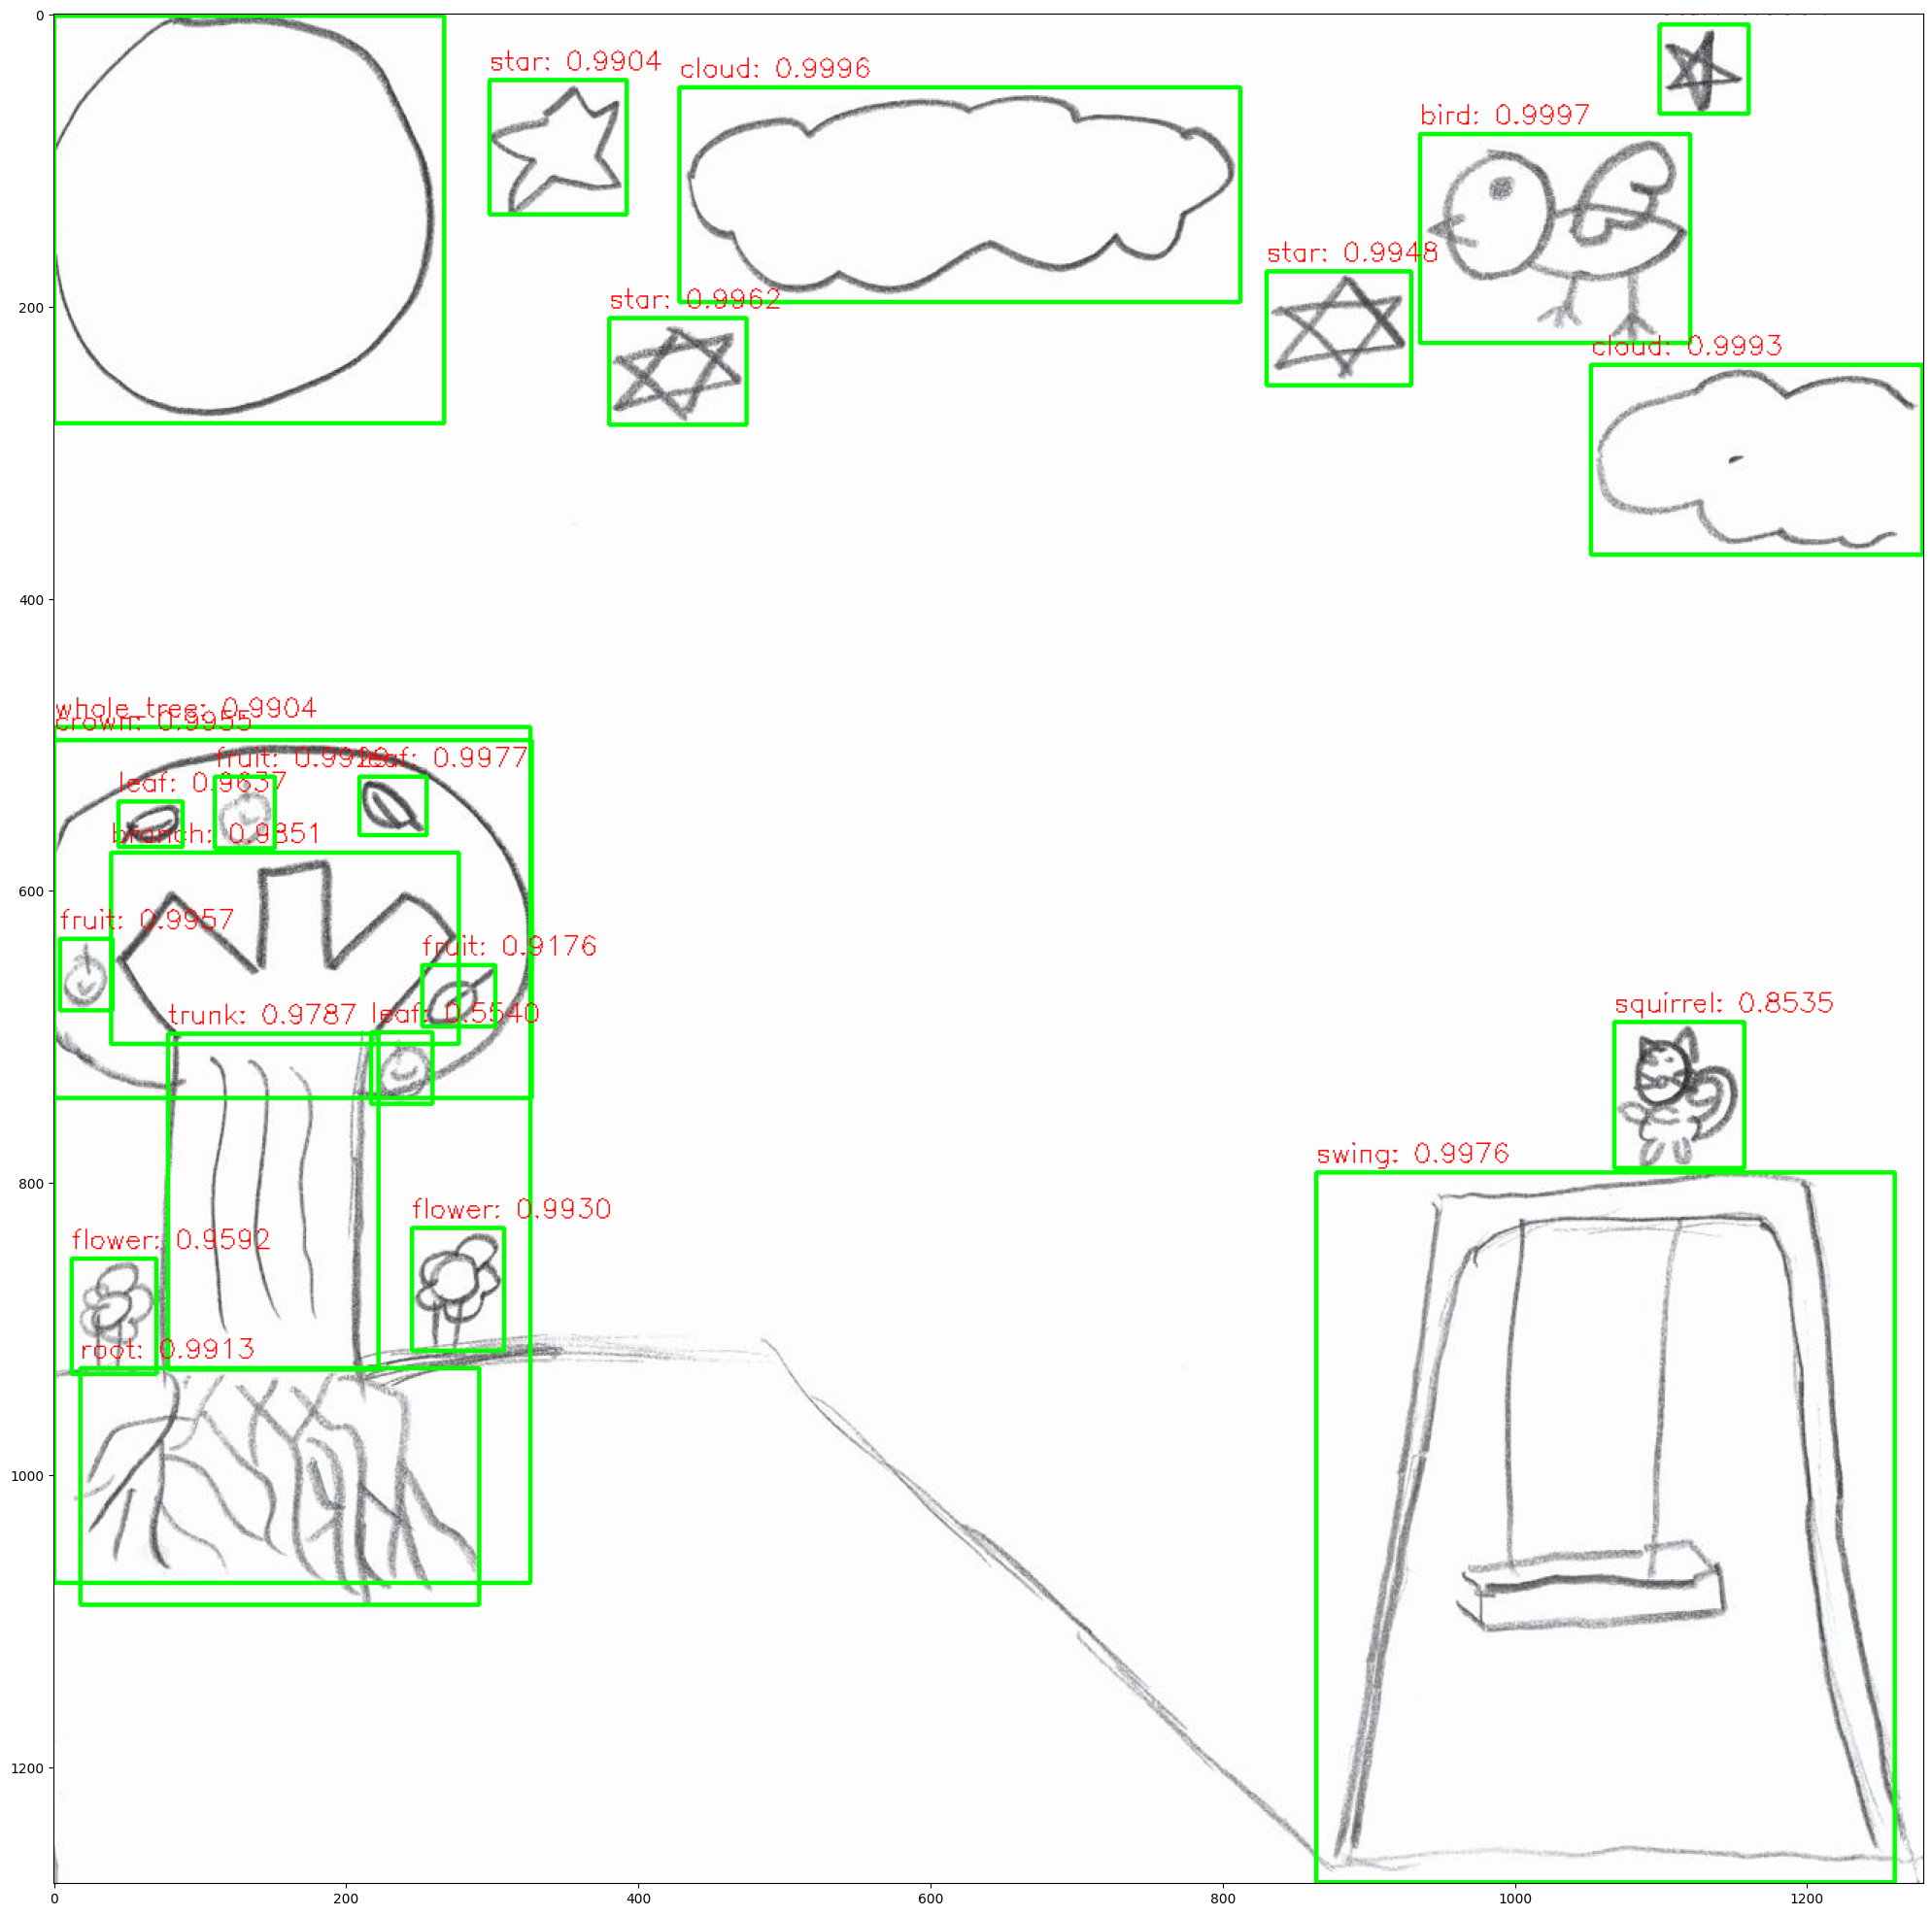

In [ ]:
# 945
#scoringTable = extractFeature('/content/gdrive/MyDrive/HTP_dataset/tree/image/tree_945.jpg')
scoringTable = extractFeature(test_img_lists[16])

In [ ]:
 scoringTable

,feature,공격성,사회불안,우울,대인회피,자존감,정서불안,애정결핍,열등감,퇴행
No,,,,,,,,,,
5,지나치게 작은 나무,0,0,1,1,1,1,0,1,1
7,좌측,0,0,0,1,0,0,1,0,0
,,0,0,1,2,1,1,1,1,1


In [ ]:
# 잎이 무성하게 많음 /content/gdrive/MyDrive/HTP_dataset/tree/image/tree_615.jpg
#val_img_lists[56]

In [ ]:
# 잎의 면적이 클 때 /content/gdrive/MyDrive/HTP_dataset/tree/image/tree_427.jpg
#val_img_lists[58]

In [ ]:
# 좌측에 위치한 나무 /content/gdrive/MyDrive/HTP_dataset/tree/image/tree_301.jpg
#val_img_lists[95]

In [ ]:
# 지나치게 작은 수관 /content/gdrive/MyDrive/HTP_dataset/tree/image/tree_181.jpg
# trunk를 인식하지 못해서 후처리 코드를 추출해내지 못함
3#val_img_lists[28]

3

In [ ]:
# 지나치게 큰 수관 /content/gdrive/MyDrive/HTP_dataset/tree/image/tree_642.jpg
# crown을 인식하지 못해서 후처리 코드 작동 X
#val_img_lists[33]

In [ ]:
# import matplotlib.pyplot as plt
# import cv2
# %matplotlib inline

# def show_detected_images(model, img_arrays, ncols=5):
#     figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
#     for i in range(ncols):
#       lists, detected_img = get_detected_img(model, img_arrays[i],  score_threshold=0.5, is_print=True)
#       detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)
#       #detected_img = cv2.resize(detected_img, (328, 328))
#       axs[i].imshow(detected_img)


# show_detected_images(model_ckpt, val_imgs[:5], ncols=5)
# show_detected_images(model_ckpt, val_imgs[5:10], ncols=5)